In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import xarray as xr
import h5py
from tqdm import tqdm
import time

from RPLB_acc_NoSTC import RPLB_acc_NoSTC
from RPLB_acc_NoSTCApril import RPLB_acc_NoSTCApril

In [2]:
c = 2.9979e8
lambda_0 = 1800e-9  # central wavelength
omega_0 = 2*np.pi*c/lambda_0

s = 57.5
tau_FWHM = np.sqrt(2)*s*np.sqrt(2**(2/(s+1))-1)/omega_0
tau_0 = s*np.sqrt(np.exp(2/(s+1))-1)/omega_0

NA = 0.1
half_angle = np.arcsin(NA)
a = 2/(np.sin(half_angle)*np.tan(half_angle)*2*np.pi/lambda_0)  # set confocal parameter
w_0 = 2/(np.tan(half_angle)*2*np.pi/lambda_0)  # set beam waist
print('{0:.3g}'.format(1e6*w_0))

P = 100e12  # FL power
Psi_0 = 0.0*np.pi
t_0 = -10*tau_0

5.7


In [3]:
t, temp, temp, KE_final = RPLB_acc_NoSTC(lambda_0, tau_0, w_0, P, Psi_0, 0.0, t_0, 0.0, 0.0)
t_April, temp, temp, KE_final_April = RPLB_acc_NoSTCApril(lambda_0, s, a, P, Psi_0, t_0, 0.0, 0.0)

print(KE_final[-1])
print(KE_final_April[-1])

92228625.1216784
92177378.19175698


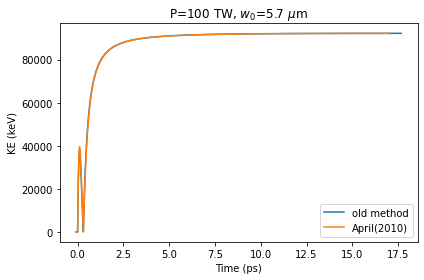

In [4]:
plt.plot(t/1e-12, KE_final/1e3)
plt.plot(t_April/1e-12, KE_final_April/1e3)
plt.legend(['old method', 'April(2010)'], loc=0)
plt.title('P='+'{0:.3g}'.format(P/1e12)+' TW, $w_0$='+'{0:.3g}'.format(1e6*w_0)+r' $\mu$m')
plt.xlabel('Time (ps)')
plt.ylabel('KE (keV)')
plt.tight_layout()

(0, 2)

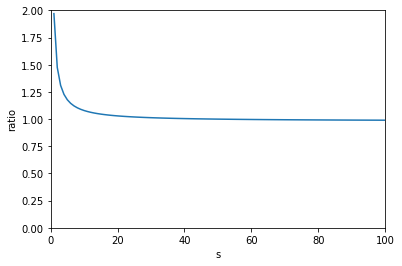

In [5]:
s = np.linspace(1, 100, 100)
tau_FWHM = np.sqrt(2)*s*np.sqrt(2**(2/(s+1))-1)/omega_0
tau_0 = s*np.sqrt(np.exp(2/(s+1))-1)/omega_0

half_angle = 0.1425
a = 2/(np.sin(half_angle)*np.tan(half_angle)*2*np.pi/lambda_0)  # set confocal parameter

ratio = np.zeros(len(s))

for i in range(0, len(s)):
    
    t_p = 2*1j*a/c
    t_m = 0.0
    f_zero_p = (1-1j*omega_0*t_p/s[i])**(-(s[i]+1))
    f_zero_m = 1
    f_one_p = (s[i]+1)*(1j*omega_0/s[i])*(1-1j*omega_0*t_p/s[i])**(-(s[i]+2))
    f_one_m = (s[i]+1)*(1j*omega_0/s[i])
    Gm_zero = f_zero_p - f_zero_m
    Gp_one = f_one_p + f_one_m
    field_April = np.abs((1/(1j*a)**2)*(Gm_zero/(1j*a)-Gp_one/c))*((a)**(1))*(s[i])**(0)*(omega_0)**(-1)*c

    z_R = (np.sqrt(1+(a*2*np.pi/lambda_0)**2)-1)/(2*np.pi/lambda_0)
    field_old = 1/(z_R)

    ratio[i] = field_April/field_old
    
plt.plot(s, ratio)
plt.xlabel('s')
plt.ylabel('ratio')
plt.xlim(0, 100)
plt.ylim(0, 2)

(0, 1.1)

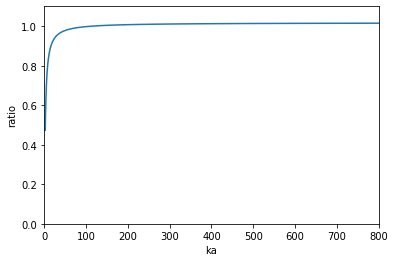

In [6]:
s = 57.5
tau_FWHM = np.sqrt(2)*s*np.sqrt(2**(2/(s+1))-1)/omega_0
tau_0 = s*np.sqrt(np.exp(2/(s+1))-1)/omega_0

half_angle = np.linspace(0.05, np.pi/4, 100)
a = 2/(np.sin(half_angle)*np.tan(half_angle)*2*np.pi/lambda_0)  # set confocal parameter

ratio = np.zeros(len(a))

for i in range(0, len(a)):
    
    t_p = 2*1j*a[i]/c
    t_m = 0.0
    f_zero_p = (1-1j*omega_0*t_p/s)**(-(s+1))
    f_zero_m = 1
    f_one_p = (s+1)*(1j*omega_0/s)*(1-1j*omega_0*t_p/s)**(-(s+2))
    f_one_m = (s+1)*(1j*omega_0/s)
    Gm_zero = f_zero_p - f_zero_m
    Gp_one = f_one_p + f_one_m
    field_April = np.abs((1/(1j*a[i])**2)*(Gm_zero/(1j*a[i])-Gp_one/c))*((a[i])**(1))*(s)**(0)*(omega_0)**(-1)*c

    z_R = (np.sqrt(1+(a[i]*2*np.pi/lambda_0)**2)-1)/(2*np.pi/lambda_0)
    field_old = 1/(z_R)

    ratio[i] = field_April/field_old
    
plt.plot(a*2*np.pi/lambda_0, ratio)
plt.xlabel('ka')
plt.ylabel('ratio')
plt.xlim(0, 800)
plt.ylim(0, 1.1)